In [5]:
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as mticker
%matplotlib inline

import cartopy.mpl.ticker as cticker
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
test_file = xr.open_dataset("/vols/satellite/home/lenk/data/S_NWC_CI_MSG3_rss-eu-VISIR_20190803T012000Z.nc")

In [9]:
test_file

<xarray.Dataset>
Dimensions:         (nx: 800, ny: 600, pal01_colors: 256, pal_RGB: 3)
Coordinates:
    lat             (ny, nx) float32 ...
    lon             (ny, nx) float32 ...
  * ny              (ny) float32 5097685.5 5094685.0 ... 3303444.0 3300443.8
  * nx              (nx) float32 -1497201.2 -1494200.9 ... 897120.56 900120.94
Dimensions without coordinates: pal01_colors, pal_RGB
Data variables:
    ci_prob30       (ny, nx) float32 ...
    ci_prob60       (ny, nx) float32 ...
    ci_prob90       (ny, nx) float32 ...
    ci_status_flag  (ny, nx) float32 ...
    ci_conditions   (ny, nx) float32 ...
    ci_quality      (ny, nx) float32 ...
    ci_pal          (pal01_colors, pal_RGB) uint8 ...
Attributes:
    Conventions:                  CF-1.6
    title:                        NWC GEO Convection Initiation Product
    history:                      2020-05-04T11:03:01Z hengst Product Created...
    institution:                  Leibniz Institute for Tropospheric Research...
    s

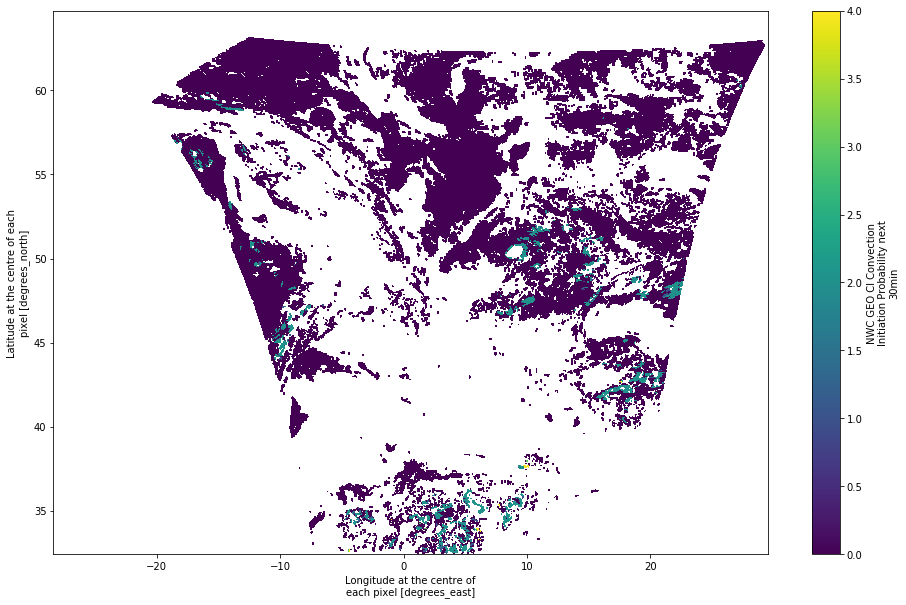

In [8]:
fig,ax = plt.subplots(1,1,figsize=(16,10))
test_file.ci_prob30.plot(x="lon",y="lat",ax=ax)

In [15]:
test_file.attibutes["test_file.attrs"]

AttributeError: 'Dataset' object has no attribute 'attibutes'

In [21]:
test_file.attrs['gdal_projection'].split("+")

['',
 'proj=geos ',
 'a=6378137.000000 ',
 'b=6356752.300000 ',
 'lon_0=9.500000 ',
 'h=35785863.000000 ',
 'sweep=y']

In [32]:
crs = ccrs.Geostationary(central_longitude=9.5, 
                         satellite_height=35785863, 
                         false_easting=0, 
                         false_northing=0, 
                         globe=None, 
                         sweep_axis='y')

In [4]:
lat_min = test_file.attrs['geospatial_lat_min']
lat_max = test_file.attrs['geospatial_lat_max']
lon_min = test_file.attrs['geospatial_lon_min']
lon_max = test_file.attrs['geospatial_lon_min']

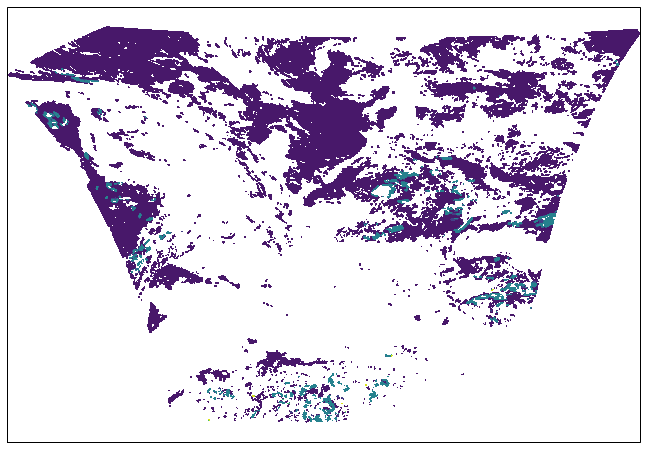

In [37]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m', alpha=0.4)
ax.contourf(test_file.lon.data, test_file.lat.data, test_file.ci_prob30.data,transform=crs)
#ax.set_extent([lon_min, lon_max, lat_min, lat_max])

#for i in np.arange(-5,30,5):
    #ax.axvline(i,linestyle='dashed',color='black',alpha=0.4)
    
,transform=ccrs.PlateCarree()

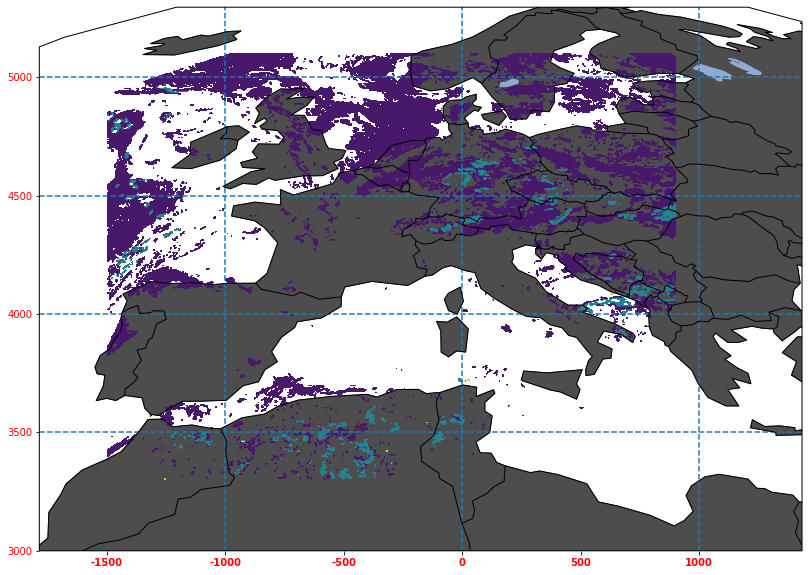

In [53]:
fig,ax = plt.subplots(1,1,figsize=(16,10),subplot_kw=dict(projection=crs))
ax.set_extent([-10 ,25, 30, 70], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND, facecolor='0.3')
ax.add_feature(cfeature.LAKES, alpha=0.9)  
ax.add_feature(cfeature.BORDERS, zorder=10)
ax.add_feature(cfeature.COASTLINE, zorder=10)

states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',  name='admin_1_states_provinces_lines',
            scale='50m', facecolor='none')
ax.add_feature(states_provinces, edgecolor='black', zorder=10)

ax.set_xticks(np.arange(-1500000,1500000,500000), crs=crs)
ax.set_xticklabels(np.arange(-1500,1500,500), color='red', weight='bold')
ax.set_yticks(np.arange(3000000,5500000,500000), crs=crs)
ax.set_yticklabels(np.arange(3000,6000,500),color='red')

for x in np.arange(-2000000,3000000,1000000):
    ax.axvline(x,linestyle='dashed')

for y in np.arange(3000000,5500000,500000):
    ax.axhline(y,linestyle='dashed')
#ax.yaxis.tick_right()

ax.contourf(test_file.lon.data, test_file.lat.data, test_file.ci_prob30.data,transform=ccrs.PlateCarree())

In [14]:
proj = ccrs.Mercator(central_longitude=180, min_latitude=15, 
    max_latitude=55)

    fig, ax = plt.subplots(subplot_kw=dict(projection=proj), figsize=(12,12))

    ax.set_extent([255 ,115, 0, 60], crs=ccrs.PlateCarree())

    ax.add_feature(cfeature.LAND, facecolor='0.3')
    ax.add_feature(cfeature.LAKES, alpha=0.9)  
    ax.add_feature(cfeature.BORDERS, zorder=10)
    ax.add_feature(cfeature.COASTLINE, zorder=10)

    states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',  name='admin_1_states_provinces_lines',
            scale='50m', facecolor='none')
    ax.add_feature(states_provinces, edgecolor='black', zorder=10)

    ax.set_xticks([120., 140., 160., 180., -160., -140., -120.], crs=crs)#crs=ccrs.PlateCarree())
    ax.set_xticklabels([120., 140., 160., 180., -160., -140., -120.], color='red', weight='bold')
    ax.set_yticks([20, 40], crs=ccrs.PlateCarree())
    ax.set_yticklabels([20, 40])
    ax.yaxis.tick_right()

    lon_formatter = cticker.LongitudeFormatter()
    lat_formatter = cticker.LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.grid(linewidth=2, color='black', alpha=0.5, linestyle='--')

IndentationError: unexpected indent (<ipython-input-14-05d5731a5a12>, line 4)

In [13]:
crs.proj4_init

'+ellps=WGS84 +proj=geos +lon_0=9.0 +lat_0=0.0 +h=35785863 +x_0=0 +y_0=0 +units=m +sweep=y +no_defs'

In [1]:
import pandas as pd


In [2]:
haci_cases = pd.read_csv("/vols/satellite/home/lenk/data/HACI_bbox_data/HACI_2008-2017-bbox-filtered.csv")

In [3]:
haci_cases.head()

,date,time,id,flags,t0,t1,l00,l01,c00,c01,l0,l1,c0,c1,dt,area0,area_max,darea,area_ratio
0,2008-01-04,18:50,1768,0,226,233,724,727,328,332,724,727,328,333,7,12,15,3,0.50
1,2008-01-05,09:35,1742,0,115,143,367,372,278,281,364,372,276,281,28,15,40,25,0.40
2,2008-01-05,18:00,4870,0,216,224,360,365,239,241,360,365,238,241,8,10,15,5,0.38
3,2008-01-05,20:00,5535,0,240,246,360,365,238,241,360,365,238,241,6,15,15,0,0.31
4,2008-01-12,12:50,1777,0,154,170,593,601,482,490,592,602,480,496,16,64,160,96,0.50


In [7]:
year = [int(irow.date.split("-")[0]) for i, irow in haci_cases.iterrows()]
month = [int(irow.date.split("-")[1]) for i, irow in haci_cases.iterrows()]

In [8]:
haci_cases = haci_cases.assign(year=year)
haci_cases = haci_cases.assign(month=month)

In [10]:
haci_cases_2013 = haci_cases[haci_cases.year==2013]

In [14]:
haci_cases_2013_selection = haci_cases_2013[(haci_cases.month>=4) & (haci_cases.month <10)]

/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [17]:
date_list = haci_cases_2013_selection.date.unique().tolist()

In [18]:
len(date_list)

131

In [21]:
len(haci_cases_2013_selection[haci_cases_2013_selection.month==6].date.unique())

27

In [22]:
len(haci_cases_2013_selection[haci_cases_2013_selection.month==4].date.unique())

12

In [23]:
len(haci_cases_2013_selection[haci_cases_2013_selection.month==5].date.unique())

26

In [24]:
len(haci_cases_2013_selection[haci_cases_2013_selection.month==7].date.unique())

23

In [25]:
len(haci_cases_2013_selection[haci_cases_2013_selection.month==8].date.unique())

24

In [26]:
len(haci_cases_2013_selection[haci_cases_2013_selection.month==9].date.unique())

19